In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = sns.load_dataset('titanic')

<AxesSubplot:>

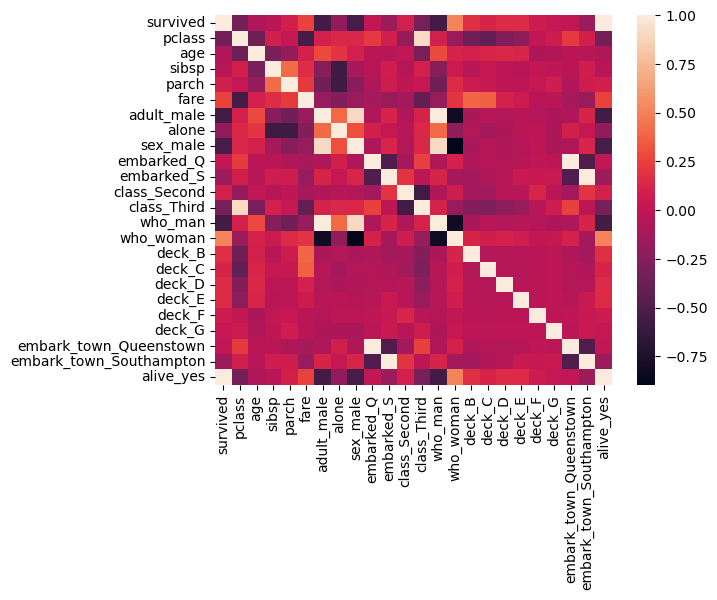

In [7]:
sns.heatmap(pd.get_dummies(df,drop_first=True).corr())

In [6]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
df = df.drop(['embark_town','alive','who','adult_male','class'], axis=1)

<AxesSubplot:>

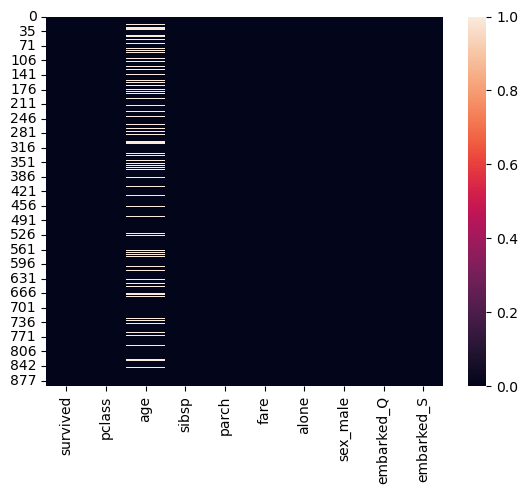

In [37]:
sns.heatmap(df.isna())

In [12]:
df = df.drop('deck', axis=1)

<AxesSubplot:>

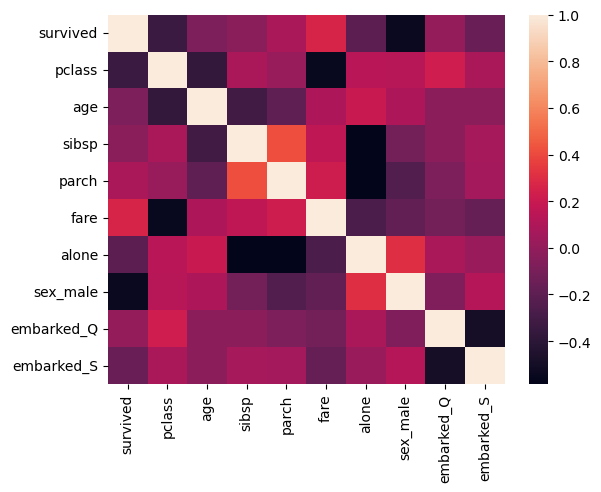

In [16]:
sns.heatmap(pd.get_dummies(df,drop_first=True).corr())

In [17]:
df_aux = df.dropna()

In [19]:
df_aux = df_aux[['age','pclass','sibsp','parch']]

In [20]:
df_aux

,age,pclass,sibsp,parch
0,22.0,3,1,0
1,38.0,1,1,0
2,26.0,3,0,0
3,35.0,1,1,0
4,35.0,3,0,0
...,...,...,...,...
885,39.0,3,0,5
886,27.0,2,0,0
887,19.0,1,0,0
889,26.0,1,0,0


In [21]:
X_train  = df_aux.drop('age',axis=1)
y_train  = df_aux['age'] 

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [24]:
linreg.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['pclass', 'sibsp', 'parch'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-6.01730031, -3.93983573, -1.40296411]),
 'rank_': 3,
 'singular_': array([28.1721902 , 22.24335279, 18.55035664]),
 'intercept_': 45.75401238544416}

In [26]:
df = df.dropna(subset=['embarked'])

In [29]:
df = pd.get_dummies(df, drop_first=True)

In [36]:
df[df['age'].isna()]['age'] = linreg.predict(df[df['age'].isna()][['pclass','sibsp','parch']])

/var/folders/z5/j7jtc0rn7311w2p0lghfl0gc0000gn/T/ipykernel_80509/490052402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['age'].isna()]['age'] = linreg.predict(df[df['age'].isna()][['pclass','sibsp','parch']])


In [38]:
missing = df[df['age'].isna()]
full = df[~df['age'].isna()]

In [40]:
missing['age'] =linreg.predict(df[df['age'].isna()][['pclass','sibsp','parch']])

/var/folders/z5/j7jtc0rn7311w2p0lghfl0gc0000gn/T/ipykernel_80509/1463701017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['age'] =linreg.predict(df[df['age'].isna()][['pclass','sibsp','parch']])


In [43]:
missing['age_imputed'] = 1

/var/folders/z5/j7jtc0rn7311w2p0lghfl0gc0000gn/T/ipykernel_80509/1344572263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['age_imputed'] = 1


In [44]:
full['age_imputed'] = 0

/var/folders/z5/j7jtc0rn7311w2p0lghfl0gc0000gn/T/ipykernel_80509/1071128012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full['age_imputed'] = 0


In [45]:
final_df = pd.concat([missing,full], axis=0)

In [46]:
final_df

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S,age_imputed
5,0,3,27.702111,0,0,8.4583,True,1,1,0,1
17,1,2,33.719412,0,0,13.0000,True,1,0,1,1
19,1,3,27.702111,0,0,7.2250,True,0,0,0,1
26,0,3,27.702111,0,0,7.2250,True,1,0,0,1
28,1,3,27.702111,0,0,7.8792,True,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.000000,0,5,29.1250,False,0,1,0,0
886,0,2,27.000000,0,0,13.0000,True,1,0,1,0
887,1,1,19.000000,0,0,30.0000,True,0,0,1,0
889,1,1,26.000000,0,0,30.0000,True,1,0,0,0


In [47]:
y = final_df['survived']
X = final_df.drop('survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [48]:
age_scaler = MinMaxScaler()
age_scaler.fit_transform(X_train[['age']])

array([[0.2436104 ],
       [0.        ],
       [0.3766054 ],
       [0.29579499],
       [0.39625516],
       [0.14571852],
       [0.3766054 ],
       [0.29579499],
       [0.46896016],
       [0.28425065],
       [0.33042803],
       [0.3766054 ],
       [0.22652893],
       [0.36386256],
       [0.69984705],
       [0.33042803],
       [0.39625516],
       [0.39625516],
       [0.65366967],
       [0.43432713],
       [0.69984705],
       [0.46572095],
       [0.33042803],
       [0.38814975],
       [0.78065746],
       [0.50359319],
       [0.45741581],
       [0.53822623],
       [0.39625516],
       [0.29579499],
       [0.63058098],
       [0.39625516],
       [0.4805045 ],
       [0.44587147],
       [0.28425065],
       [0.34197237],
       [0.13417417],
       [0.09954114],
       [0.31837974],
       [0.29579499],
       [0.14571852],
       [0.50359319],
       [0.08799679],
       [0.49204885],
       [0.39625516],
       [0.39625516],
       [0.35351672],
       [0.307

In [50]:
X_train['age'] = age_scaler.transform(X_train[['age']])

In [53]:
numvars = ['sibsp', 'parch','fare']
for v in numvars:
    scaler = MinMaxScaler()
    scaler.fit(X[[v]])
    X_train[v] = scaler.transform(X_train[[v]])
    X_test[v] = scaler.transform(X_test[[v]])

In [56]:
X_test['age'] = age_scaler.transform(X_test[['age']])

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [59]:
confusion_matrix(y_train, logreg.predict(X_train))

array([[351,  56],
       [ 72, 187]])

In [61]:
print(classification_report(y_train, logreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       407
           1       0.77      0.72      0.75       259

    accuracy                           0.81       666
   macro avg       0.80      0.79      0.80       666
weighted avg       0.81      0.81      0.81       666



In [62]:
confusion_matrix(y_test, logreg.predict(X_test))

array([[116,  26],
       [ 23,  58]])

In [73]:
confusion_matrix(y_test, preds80)

array([[141,   1],
       [ 51,  30]])

In [63]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       142
           1       0.69      0.72      0.70        81

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.78      0.78       223



In [70]:
preds80 = [1 if p>0.8 else 0 for p in logreg.predict_proba(X_test)[:,1]]

In [65]:
logreg.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0])

In [71]:
preds80

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0]